In [1]:
import csv
import matplotlib.pyplot as plt
import numpy as np

In [2]:
filename = 'Mesures2_.csv'
data = []
labels = []
header = None
with open(filename, 'r') as file:
    rdr = csv.reader(file)
    for row in rdr:
        if not header:
            header = row[:]
        else:
            data.append(row[:])
data = np.array(data, dtype=np.float)
labels = np.array(labels)
nmesures, nvariables = data.shape

filename2 = 'mesures.csv'
data2 = []
header2 = None
with open(filename2, 'r') as file2:
    rdr2 = csv.reader(file2)
    for row2 in rdr2:
        if not header2:
            header2 = row2[:]
        else:
            data2.append(row2[:])
data2 = np.array(data2, dtype=np.float)
nmesures2, nvariables2 = data2.shape

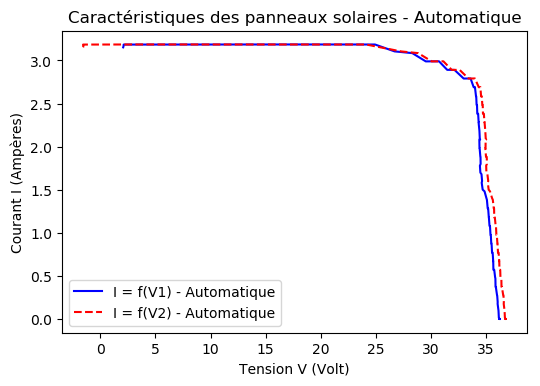

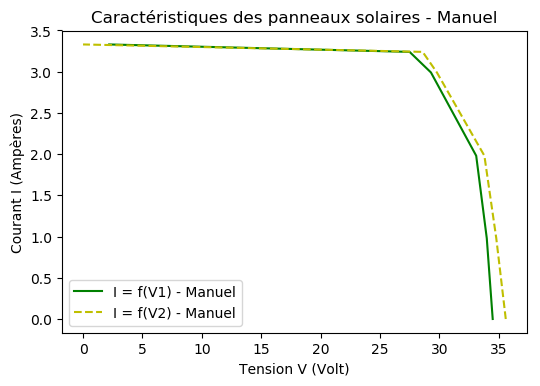

In [22]:
fig = plt.figure(figsize=(6, 4), dpi=100)
ax = plt.axes()
ax.plot(data[:80,1],data[:80,5],'b',label='I = f(V1) - Automatique')
ax.plot(data[:80,4],data[:80,5],'--r',label='I = f(V2) - Automatique')
ax = ax.set(xlabel='Tension V (Volt)', ylabel='Courant I (Ampères)')
plt.legend(loc='lower left');
plt.title("Caractéristiques des panneaux solaires - Automatique")
plt.savefig("Automatique/MesuresPanneauSolaire_Courant_Automatique.png" )

fig2 = plt.figure(figsize=(6, 4), dpi=100)
ax2 = plt.axes()
ax2.plot(data2[:,1],data2[:,3],'g',label='I = f(V1) - Manuel')
ax2.plot(data2[:,2],data2[:,3],'--y',label='I = f(V2) - Manuel')
ax2 = ax2.set(xlabel='Tension V (Volt)', ylabel='Courant I (Ampères)')
plt.legend(loc='lower left');
plt.title("Caractéristiques des panneaux solaires - Manuel")
plt.savefig("Manuel/MesuresPanneauSolaire_Courant_Manuel.png" )

In [4]:
#recherche du point de fonctionnement à puissance maximale
pa = 0
pb = 0
coorda = 0
coordb = 0
for i in range(86):
    pprovisoire1 = data[i,1]*data[i,5]
    pprovisoire2 = data[i,4]*data[i,5]
    if(pprovisoire1 >= pa):
        pa = pprovisoire1
        coorda = i
    if(pprovisoire2>=pb):
        pb = pprovisoire2
        coordb = i

In [5]:
#calcul de rendement        
surface = 60*0.156*0.156
eclairementa = data[coorda,7]
eclairementb = data[coordb,7]
rendementa = 100*pa/(surface*eclairementa)
rendementb = 100*pb/(surface*eclairementb)

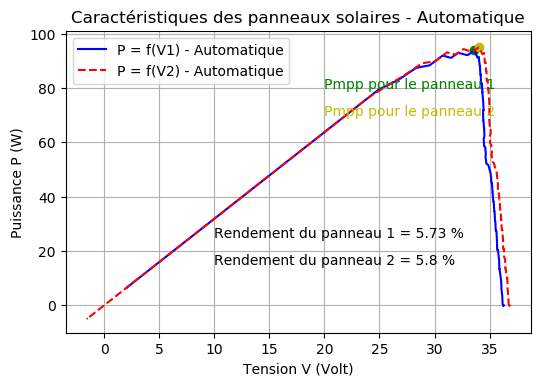

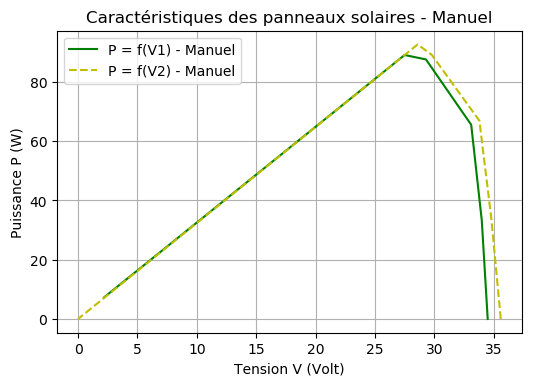

In [7]:
#tracé des courbes
fig = plt.figure(figsize=(6, 4), dpi=100)
ax = plt.axes()
ax.plot(data[:80,1],data[:80,5]*data[:80,1],'b',label='P = f(V1) - Automatique')
ax.plot(data[:80,4],data[:80,5]*data[:80,4],'--r',label='P = f(V2) - Automatique')
ax.scatter(data[coorda,1],pa,color='g')
ax.scatter(data[coordb,4],pb,color='y')
ax.annotate('Pmpp pour le panneau 1',xy=[data[coorda,1],pa],xytext=[20,80],color='g')
ax.annotate('Pmpp pour le panneau 2',xy=[data[coorda,2],pb],xytext=[20,70], color='y')
ax.annotate('Rendement du panneau 1 = {0} %'.format(round(rendementa,2)),xy=[0,0],xytext=[10,25])
ax.annotate('Rendement du panneau 2 = {0} %'.format(round(rendementb,2)),xy=[0,0],xytext=[10,15])
ax = ax.set(xlabel='Tension V (Volt)', ylabel='Puissance P (W)')
plt.legend(loc='upper left');
plt.grid()
plt.title("Caractéristiques des panneaux solaires - Automatique")
plt.savefig("Automatique/MesuresPanneauSolaire_Puissance_Automatique.png" )


        
fig2 = plt.figure(figsize=(6, 4), dpi=100)
ax2 = plt.axes()
ax2.plot(data2[:,1],data2[:,3]*data2[:,1],'g',label='P = f(V1) - Manuel')
ax2.plot(data2[:,2],data2[:,3]*data2[:,2],'--y',label='P = f(V2) - Manuel')
ax2 = ax2.set(xlabel='Tension V (Volt)', ylabel='Puissance P (W)')
plt.legend(loc='upper left');
plt.grid()
plt.title("Caractéristiques des panneaux solaires - Manuel")
plt.savefig("Manuel/MesuresPanneauSolaire_Puissance_Manuel.png" )

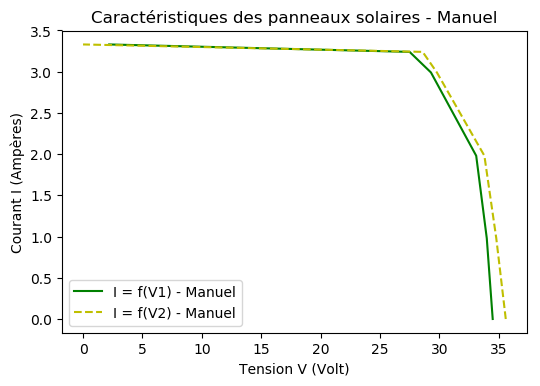

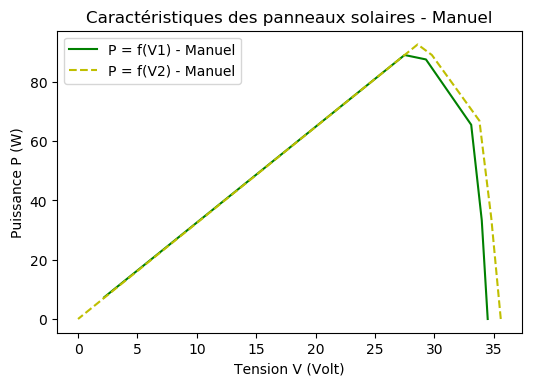